# Lightning Talk: SymPy
![http://www.sympy.org/static/images/logo.png](http://www.sympy.org/static/images/logo.png)

## Why is SymPy Cool?

* SymPy does math
* SymPy is open source
* Math is cool
* Open source is really cool
* Therefore SymPy is really cool
---
More seriously:

* Python library - combine it with NumPy, matplotlib, other shiny toys
* Python *library* - put it in your next application. Want to make [the next Wolfram|Alpha](http://sympygamma.com)? Do it with SymPy.
* Use it interactively - helps you with math homework
* Written in Python - don't have to deal with JavaScript 😁 (or Lisp, if you tried to use Maxima)
* Don't have to pay for Maple or Mathematica
---
Grabbing SymPy:

* `pip install sympy`, `easy_install sympy`
* Included in Anaconda, or use `conda install sympy`
* Part of Sage as well
* Want the source?

      git clone git@github.com:sympy/sympy.git
---
What is symbolic mathematics?

* TI-84 or MATLAB - do calculations with specific numbers; get approximate results
* SymPy or Mathematica - do calculations with variables, exact constants; get exact results
* Compare:

In [148]:
from sympy import *
init_printing()

In [150]:
integrate(sqrt(1 - x**2), (x, -1, 1))

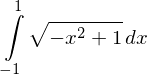

In [152]:
Integral(sqrt(1-x**2), (x, -1, 1))

or even:

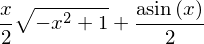

In [147]:
integrate(sqrt(1 - x**2))

What would the TI-84 give you? Something like $1.57\dots$. And SymPy can do things the TI-84 can barely express, as we'll see.

## Demos

You're writing a complicated if expression and you're wondering if you can simplify the cases a bit.

In [154]:
x, y, z, w = symbols('x y z w')
expression = (x & ~y) | (x & y) | (x & z) | (~y & w) | (x & ~y & w)
expression

In [155]:
simplify_logic(expression)

Or you're wondering if the if block will ever even run!

In [156]:
expression = (x | y | z) & (~(x & y))
expression

In [157]:
satisfiable(expression)

{x: False, z: True, y: False}

In [40]:
expression = x & ~(x | y)
expression

In [42]:
satisfiable(expression)

False

---
You're doing your calc homework and wondering if some series might have a simpler form:

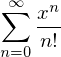

In [44]:
n = symbols('n')
Sum(x**n/factorial(n), (n, 0, oo))

In [46]:
Sum(x**n/factorial(n), (n, 0, oo)).doit()

Or maybe you're in 2800 instead:

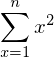

In [48]:
Sum(x**2, (x, 1, n))

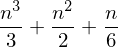

In [50]:
Sum(x**2, (x, 1, n)).doit()

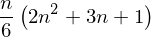

In [132]:
Sum(x**2, (x, 1, n)).doit().together()

Or your 2930 teacher decided to assign you a really long, tedious problem:

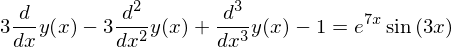

In [137]:
y = Function('y')
differential_equation = Eq(y(x).diff(x, x, x) - 3 * y(x).diff(x, x) + 3 * y(x).diff(x) - 1, sin(3*x)*exp(7*x))
differential_equation

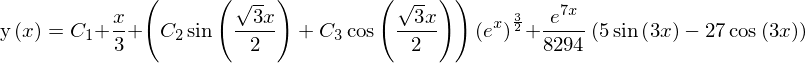

In [138]:
dsolve(differential_equation)

---
You're doing physics homework and you have to figure out how the heck a double pendulum moves. Specifically, you want to derive the equations of motion.

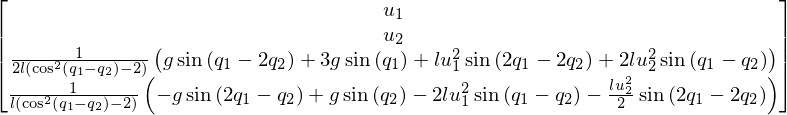

In [54]:
from sympy.physics.mechanics import *

q1, q2 = dynamicsymbols('q1 q2')
q1d, q2d = dynamicsymbols('q1 q2', 1)
u1, u2 = dynamicsymbols('u1 u2')
u1d, u2d = dynamicsymbols('u1 u2', 1)
l, m, g = symbols('l m g')

N = ReferenceFrame('N')
A = N.orientnew('A', 'Axis', [q1, N.z])
B = N.orientnew('B', 'Axis', [q2, N.z])

A.set_ang_vel(N, u1 * N.z)
B.set_ang_vel(N, u2 * N.z)

O = Point('O')
P = O.locatenew('P', l * A.x)
R = P.locatenew('R', l * B.x)

O.set_vel(N, 0)
P.v2pt_theory(O, N, A)
R.v2pt_theory(P, N, B)

ParP = Particle('ParP', P, m)
ParR = Particle('ParR', R, m)

kd = [q1d - u1, q2d - u2]
FL = [(P, m * g * N.x), (R, m * g * N.x)]
BL = [ParP, ParR]

KM = KanesMethod(N, q_ind=[q1, q2], u_ind=[u1, u2], kd_eqs=kd)

(fr, frstar) = KM.kanes_equations(FL, BL)
kdd = KM.kindiffdict()
mm = KM.mass_matrix_full
fo = KM.forcing_full
qudots = mm.inv() * fo
qudots = qudots.subs(kdd)
qudots.simplify()
mechanics_printing()
qudots

I sure don't want to derive *that* by hand.

---
How about doing some stats? Stats is tedious. R is annoying. Python is fun. (Well, this is more like simple probability, because I don't know stats.)

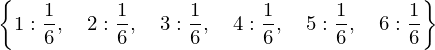

In [139]:
from sympy.stats import Die, Coin, density, P, E, where
D6 = Die('A', sides=6)
D6_ = Die('B', sides=6)
density(D6).dict

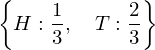

In [140]:
C = Coin('C', p=Rational(1,3))  # An unfair coin
density(C).dict

In [141]:
P(D6 + D6_ >= 10)

In [142]:
E(D6)

In [143]:
P(Eq(C, Symbol('H'))) # What is the probability the coin lands heads

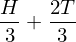

In [144]:
E(C) # What is the expected value of a coin toss

In [145]:
where(D6 + D6_ < 6)  # In what outcomes is 2d6 < 6

---
You're building the next great MMORPG and for some reason need to churn out C code that calculates the eigenvalues of a rotation matrix. Luckily SymPy has you covered all the way.

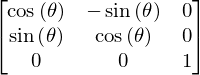

In [164]:
theta = symbols('theta')
M = Matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])
M

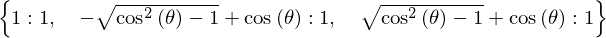

In [165]:
M.eigenvals()

In [166]:
formulas = list(M.eigenvals().keys())
formulas[1]  # What about imaginary results?

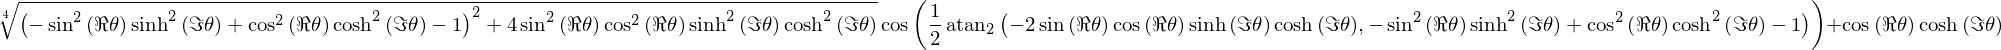

In [167]:
formula = formulas[1].as_real_imag()[0]  # Just want the real part
formula

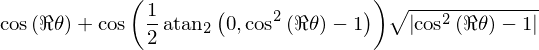

In [168]:
formula = formula.subs(im(theta), 0)  # Only dealing with real angles
formula

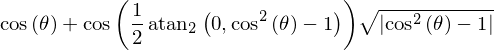

In [169]:
formula = formula.subs(re(theta), theta)  # Re(theta) = theta for real angles
formula

In [170]:
from sympy.utilities.codegen import codegen
[(c_name, c_code), (h_name, c_header)] = codegen(("f", formula), "C", "test", header=False, empty=False)

In [171]:
c_name

'test.c'

In [172]:
print(c_code)

#include "test.h"
#include <math.h>
double f(double theta) {
   double f_result;
   f_result = cos(theta) + cos((1.0L/2.0L)*atan2(0, pow(cos(theta), 2) - 1))*sqrt(fabs(pow(cos(theta), 2) - 1));
   return f_result;
}



In [25]:
print(h_name)

test.h


In [95]:
print(c_header)

#ifndef PROJECT__TEST__H
#define PROJECT__TEST__H
double f(double theta);
#endif



In [124]:
[(octave_file, octave_code)] = codegen(("test", formula), "OCTAVE", "test", header=False, empty=False)

In [125]:
print(octave_code)

function out1 = test(theta)
  out1 = cos(theta) + cos(atan2(0, cos(theta).^2 - 1)/2).*sqrt(abs(cos(theta).^2 - 1));
end



And more. Maybe you [need a topic for a master's thesis](http://mattpap.github.io/masters-thesis/html/index.html), or you're a [bioengineer and need to do some work](http://continuity.ucsd.edu/Continuity).

## Contributing

* Mailing list
* https://github.com/sympy/sympy/wiki/Introduction-to-contributing
* Very friendly community
    * Used to dealing with newcomers and students! (GCI/GSoC)
    * Lead dev is a former GSoC student
    * GSoC going on right now! (Submit under PSF/NumFOCUS/Sage)
* Lots of tasks to work on
    * Documentation, triaging, new features, bug fixing...
* Not just Python
    * Web applications
    * Client-side console
* BSD license
    * Use it even in commercial software
    * Example: third party Android app https://while.io/mathstep